# Research notebook

This Jupyter Notebook will serve as the research lexicon and reference for the project, it will contain all the proofs for the theories that are utilised in the creation of the model. This will also serve as a demonstation of the model type that can be created to show the feasability and accuracy of the models through their evolution.

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import svm

In [74]:
df1 = pd.read_csv("../donated_capture_jp_1.csv")
df1

destIP  destPort            srcIP  srcPort  \
0    108.177.125.189       443   10.126.224.105    55558   
1    108.177.125.189       443   10.126.224.105    55558   
2     10.126.224.105     55558  108.177.125.189      443   
3     216.58.220.110       443   10.126.224.105    60600   
4     10.126.224.105     60600   216.58.220.110      443   
5     10.126.224.105     60600   216.58.220.110      443   
6     10.126.224.105     60600   216.58.220.110      443   
7     216.58.220.110       443   10.126.224.105    60600   
8     10.126.224.105     55558  108.177.125.189      443   
9    108.177.125.189       443   10.126.224.105    55558   
10    216.58.220.110       443   10.126.224.105    60600   
11    10.126.224.105     60600   216.58.220.110      443   
12    172.217.25.195       443   10.126.224.105    56714   
13    172.217.25.195       443   10.126.224.105    56714   
14    172.217.25.195       443   10.126.224.105    56714   
15    10.126.224.105     56714   172.217.25.195      443   
16    172.217.25.195       443   10.126.224.105    56714   
17    10.126.224.105     56714   172.217.25.195      443   
18    172.217.25.195       443   10.126.224.105    56714   
19    172.217.25.195       443   10.126.224.105    56714   
20    10.126.224.105     56714   172.217.25.195      443   
21    172.217.25.195       443   10.126.224.105    56714   
22    10.126.224.105     56714   172.217.25.195      443   
23    10.126.224.105     56714   172.217.25.195      443   
24    10.126.224.105     56714   172.217.25.195      443   
25    172.217.25.195       443   10.126.224.105    56714   
26    10.126.224.105     56714   172.217.25.195      443   
27    172.217.25.195       443   10.126.224.105    56714   
28    172.217.25.195       443   10.126.224.105    56714   
29    10.126.224.105     56714   172.217.25.195      443   
..               ...       ...              ...      ...   
574   172.217.25.195       443   10.126.224.105    56714   
575   10.126.224.105     56714   172.217.25.195      443   
576   172.217.25.195       443   10.126.224.105    56714   
577   10.126.224.105     56714   172.217.25.195      443   
578   172.217.25.195       443   10.126.224.105    56714   
579      10.127.5.17        53   10.126.224.105    54165   
580   10.126.224.105     54165      10.127.5.17       53   
581   216.58.196.138       443   10.126.224.105    54239   
582   10.126.224.105     54239   216.58.196.138      443   
583      10.127.5.17        53   10.126.224.105    50111   
584      10.127.5.17        53   10.126.224.105    58530   
585   10.126.224.105     50111      10.127.5.17       53   
586   10.126.224.105     58530      10.127.5.17       53   
587      10.127.5.17        53   10.126.224.105    61067   
588   10.126.224.105     61067      10.127.5.17       53   
589   216.58.220.110       443   10.126.224.105    60600   
590   10.126.224.105     60600   216.58.220.110      443   
591   10.126.224.105     60600   216.58.220.110      443   
592   10.126.224.105     60600   216.58.220.110      443   
593   216.58.220.110       443   10.126.224.105    60600   
594   10.126.224.105     60600   216.58.220.110      443   
595   10.126.224.105     60600   216.58.220.110      443   
596   10.126.224.105     60600   216.58.220.110      443   
597   10.126.224.105     60600   216.58.220.110      443   
598   216.58.220.110       443   10.126.224.105    60600   
599   216.58.220.110       443   10.126.224.105    60600   
600   216.58.196.142       443   10.126.224.105    57281   
601   10.126.224.105     57281   216.58.196.142      443   
602  108.177.125.189       443   10.126.224.105    55558   
603   10.126.224.105     55558  108.177.125.189      443   

                                                  data  
0               8f:1a:f2:55:20:01:7b:b3:15:49:c4:07:5e  
1               e1:a3:b5:7f:89:cd:b8:8d:4f:ca:ca:d1:47  
2    7c:31:0d:9c:f5:ad:58:9b:cf:8a:55:82:11:18:50:a...  
3    bd:4f:04:52:c0:b6:43:23:ad:03:3d:1a:a6:a9:71:e...  
4    ec:

['destIP', 'destPort', 'srcIP', 'srcPort', 'data']


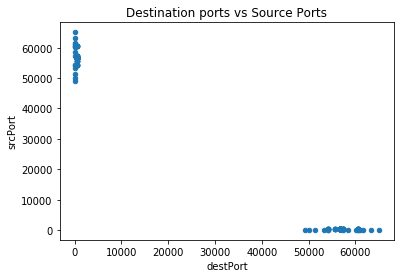

In [75]:
print(df1.columns.tolist())
df1.plot.scatter(x='destPort', y='srcPort')
plt.title('Destination ports vs Source Ports')
plt.show()

From the above plot of source ports and destination ports we can see the dataset is widely varied and must be sorted and manipulated before meaningful conclusions can be drawn

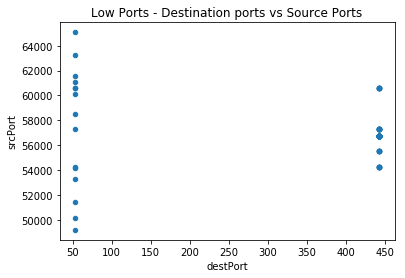

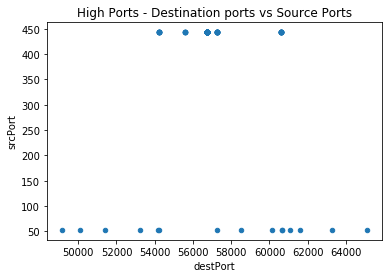

In [76]:
dfLowPorts = df1[df1.destPort < 1000]
dfLowPorts.plot.scatter(x='destPort', y='srcPort')
plt.title('Low Ports - Destination ports vs Source Ports')
plt.show()

dfHighPorts = df1[df1.destPort > 1000]
dfHighPorts.plot.scatter(x='destPort', y='srcPort')
plt.title('High Ports - Destination ports vs Source Ports')
plt.show()

From the above breakdown into port categories we can see that the port distribution is inversed at either end of the spectrum of port distribution.

This fits in well with the Proportional packet rate assumption. We will now attempt to demonstrate this distribution, find the 'normal' rate of packet rate then compare to a known ddos set.

In [77]:
print('Low port values - sorted')
print('Number of rows:',dfLowPorts.shape[0])
dfLowPorts.sort_values(by=['destPort'])

Low port values - sorted
Number of rows: 233


destIP  destPort           srcIP  srcPort  \
37       10.127.5.17        53  10.126.224.105    53248   
39       10.127.5.18        53  10.126.224.105    60629   
48       10.127.5.17        53  10.126.224.105    61601   
36       10.127.5.17        53  10.126.224.105    60629   
50       10.127.5.17        53  10.126.224.105    51420   
52       10.127.5.17        53  10.126.224.105    60131   
54       10.127.5.17        53  10.126.224.105    54238   
46       10.127.5.17        53  10.126.224.105    65086   
579      10.127.5.17        53  10.126.224.105    54165   
44       10.127.5.17        53  10.126.224.105    49176   
583      10.127.5.17        53  10.126.224.105    50111   
584      10.127.5.17        53  10.126.224.105    58530   
587      10.127.5.17        53  10.126.224.105    61067   
69       10.127.5.17        53  10.126.224.105    63286   
71       10.127.5.17        53  10.126.224.105    57272   
405   172.217.25.195       443  10.126.224.105    56714   
409   172.217.25.195       443  10.126.224.105    56714   
410   172.217.25.195       443  10.126.224.105    56714   
412   172.217.25.195       443  10.126.224.105    56714   
400  108.177.125.189       443  10.126.224.105    55558   
398   172.217.25.195       443  10.126.224.105    56714   
401   172.217.25.195       443  10.126.224.105    56714   
406   172.217.25.195       443  10.126.224.105    56714   
0    108.177.125.189       443  10.126.224.105    55558   
395   216.58.196.142       443  10.126.224.105    57281   
414   172.217.25.195       443  10.126.224.105    56714   
415   172.217.25.195       443  10.126.224.105    56714   
416   172.217.25.195       443  10.126.224.105    56714   
417   172.217.25.195       443  10.126.224.105    56714   
418   172.217.25.195       443  10.126.224.105    56714   
..               ...       ...             ...      ...   
280   172.217.25.195       443  10.126.224.105    56714   
159   172.217.25.195       443  10.126.224.105    56714   
238   172.217.25.195       443  10.126.224.105    56714   
232   172.217.25.195       443  10.126.224.105    56714   
163   172.217.25.195       443  10.126.224.105    56714   
166   172.217.25.195       443  10.126.224.105    56714   
167   172.217.25.195       443  10.126.224.105    56714   
184   172.217.25.195       443  10.126.224.105    56714   
185   172.217.25.195       443  10.126.224.105    56714   
186   172.217.25.195       443  10.126.224.105    56714   
187   172.217.25.195       443  10.126.224.105    56714   
188   172.217.25.195       443  10.126.224.105    56714   
189   172.217.25.195       443  10.126.224.105    56714   
190   172.217.25.195       443  10.126.224.105    56714   
191   172.217.25.195       443  10.126.224.105    56714   
235   172.217.25.195       443  10.126.224.105    56714   
196   172.217.25.195       443  10.126.224.105    56714   
199   172.217.25.195       443  10.126.224.105    56714   
203   172.217.25.195       443  10.126.224.105    56714   
205   172.217.25.195       443  10.126.224.105    56714   
208   172.217.25.195       443  10.126.224.105    56714   
211   172.217.25.195       443  10.126.224.105    56714   
214   172.217.25.195       443  10.126.224.105    56714   
217   172.217.25.195       443  10.126.224.105    56714   
220   172.217.25.195       443  10.126.224.105    56714   
223   172.217.25.195       443  10.126.224.105    56714   
226   172.217.25.195       443  10.126.224.105    56714   
230   172.217.25.195       443  10.126.224.105    56714   
197   172.217.25.195       443  10.126.224.105    56714   
602  108.177.125.189       443  10.126.224.105    55558   

                                                  data  
37                                                 NaN  
39                                                 NaN  
48                                                 NaN  
36                                                 NaN  
50                                                 NaN  
52           

In [78]:
print('High port values - sorted')
print('Number of rows:',dfHighPorts.shape[0])
dfHighPorts.sort_values(by=['destPort'])

High port values - sorted
Number of rows: 371


destIP  destPort            srcIP  srcPort  \
45   10.126.224.105     49176      10.127.5.17       53   
585  10.126.224.105     50111      10.127.5.17       53   
51   10.126.224.105     51420      10.127.5.17       53   
38   10.126.224.105     53248      10.127.5.17       53   
580  10.126.224.105     54165      10.127.5.17       53   
55   10.126.224.105     54238      10.127.5.17       53   
58   10.126.224.105     54239   216.58.196.138      443   
59   10.126.224.105     54239   216.58.196.138      443   
60   10.126.224.105     54239   216.58.196.138      443   
63   10.126.224.105     54239   216.58.196.138      443   
64   10.126.224.105     54239   216.58.196.138      443   
65   10.126.224.105     54239   216.58.196.138      443   
67   10.126.224.105     54239   216.58.196.138      443   
582  10.126.224.105     54239   216.58.196.138      443   
399  10.126.224.105     55558  108.177.125.189      443   
43   10.126.224.105     55558  108.177.125.189      443   
2    10.126.224.105     55558  108.177.125.189      443   
603  10.126.224.105     55558  108.177.125.189      443   
8    10.126.224.105     55558  108.177.125.189      443   
33   10.126.224.105     56714   172.217.25.195      443   
408  10.126.224.105     56714   172.217.25.195      443   
407  10.126.224.105     56714   172.217.25.195      443   
404  10.126.224.105     56714   172.217.25.195      443   
403  10.126.224.105     56714   172.217.25.195      443   
402  10.126.224.105     56714   172.217.25.195      443   
397  10.126.224.105     56714   172.217.25.195      443   
411  10.126.224.105     56714   172.217.25.195      443   
396  10.126.224.105     56714   172.217.25.195      443   
376  10.126.224.105     56714   172.217.25.195      443   
375  10.126.224.105     56714   172.217.25.195      443   
..              ...       ...              ...      ...   
601  10.126.224.105     57281   216.58.196.142      443   
393  10.126.224.105     57281   216.58.196.142      443   
360  10.126.224.105     57281   216.58.196.142      443   
391  10.126.224.105     57281   216.58.196.142      443   
389  10.126.224.105     57281   216.58.196.142      443   
388  10.126.224.105     57281   216.58.196.142      443   
390  10.126.224.105     57281   216.58.196.142      443   
385  10.126.224.105     57281   216.58.196.142      443   
383  10.126.224.105     57281   216.58.196.142      443   
382  10.126.224.105     57281   216.58.196.142      443   
387  10.126.224.105     57281   216.58.196.142      443   
586  10.126.224.105     58530      10.127.5.17       53   
53   10.126.224.105     60131      10.127.5.17       53   
590  10.126.224.105     60600   216.58.220.110      443   
594  10.126.224.105     60600   216.58.220.110      443   
4    10.126.224.105     60600   216.58.220.110      443   
5    10.126.224.105     60600   216.58.220.110      443   
11   10.126.224.105     60600   216.58.220.110      443   
595  10.126.224.105     60600   216.58.220.110      443   
591  10.126.224.105     60600   216.58.220.110      443   
596  10.126.224.105     60600   216.58.220.110      443   
597  10.126.224.105     60600   216.58.220.110      443   
6    10.126.224.105     60600   216.58.220.110      443   
592  10.126.224.105     60600   216.58.220.110      443   
40   10.126.224.105     60629      10.127.5.18       53   
41   10.126.224.105     60629      10.127.5.17       53   
588  10.126.224.105     61067      10.127.5.17       53   
49   10.126.224.105     61601      10.127.5.17       53   
70   10.126.224.105     63286      10.127.5.17       53   
47   10.126.224.105     65086      10.127.5.17       53   

                                                  data  
45                                                 NaN  
585                                                NaN  
51                                                 NaN  
38                                                 NaN  
580                                                NaN  
55          

In [79]:
print(dfLowPorts.shape)
print(dfHighPorts.shape)
print('Low destination ports/ High destination ports:',dfLowPorts.shape[0]/dfHighPorts.shape[0])

(233, 5)
(371, 5)
Low destination ports/ High destination ports: 0.628032345013477


Fromt this we can see that there is a roughly 60% distribution for the legititmate low port destination to high port destination. We can use this as our base assumption for our proportional packet rate.

Now we must filter and analyse data further.

To do this we will analyse our ports breakdowns.

In [80]:
print('List of unique high ports:',dfHighPorts.destPort.unique())
print('List of unique low ports:',dfLowPorts.destPort.unique())

List of unique high ports: [55558 60600 56714 53248 60629 49176 65086 61601 51420 60131 54238 54239
 63286 57272 57281 54165 50111 58530 61067]
List of unique low ports: [443  53]


Given our lists of ports we can assume somethings. We will break these assumptions down  into low and high port categories to simplify the explanation:

Low Ports:
Port 53: This port is a system port, officially used as a DNS lookup service port. This may prove useful later on however currently we have no use for it.
Port 443: Another system port, officially used for HTTPS communication, however it can be used as a port for QUIC a UDP transport protocol typically utilised by google. This is an important port for us as it is the port used for our low port UDP communication in this capture.

High Ports:
All the high ports fall about the 49151 range of port allocation meaning that they are dynamic or private ports which are used for customized services and temporary purposes.

From this we can see that we can further trim our Low Port data set, removing all DNS lookups.

In [81]:
dfLowPorts = dfLowPorts[dfLowPorts.destPort != 53]
dfHighPorts = dfHighPorts[dfHighPorts.srcPort != 53]
dfLowPorts

destIP  destPort           srcIP  srcPort  \
0    108.177.125.189       443  10.126.224.105    55558   
1    108.177.125.189       443  10.126.224.105    55558   
3     216.58.220.110       443  10.126.224.105    60600   
7     216.58.220.110       443  10.126.224.105    60600   
9    108.177.125.189       443  10.126.224.105    55558   
10    216.58.220.110       443  10.126.224.105    60600   
12    172.217.25.195       443  10.126.224.105    56714   
13    172.217.25.195       443  10.126.224.105    56714   
14    172.217.25.195       443  10.126.224.105    56714   
16    172.217.25.195       443  10.126.224.105    56714   
18    172.217.25.195       443  10.126.224.105    56714   
19    172.217.25.195       443  10.126.224.105    56714   
21    172.217.25.195       443  10.126.224.105    56714   
25    172.217.25.195       443  10.126.224.105    56714   
27    172.217.25.195       443  10.126.224.105    56714   
28    172.217.25.195       443  10.126.224.105    56714   
31    172.217.25.195       443  10.126.224.105    56714   
35    172.217.25.195       443  10.126.224.105    56714   
42   108.177.125.189       443  10.126.224.105    55558   
56    216.58.196.138       443  10.126.224.105    54239   
57    216.58.196.138       443  10.126.224.105    54239   
61    216.58.196.138       443  10.126.224.105    54239   
62    216.58.196.138       443  10.126.224.105    54239   
66    216.58.196.138       443  10.126.224.105    54239   
68    216.58.196.138       443  10.126.224.105    54239   
73    172.217.25.195       443  10.126.224.105    56714   
77    172.217.25.195       443  10.126.224.105    56714   
78    172.217.25.195       443  10.126.224.105    56714   
82    172.217.25.195       443  10.126.224.105    56714   
83    172.217.25.195       443  10.126.224.105    56714   
..               ...       ...             ...      ...   
535   172.217.25.195       443  10.126.224.105    56714   
536   172.217.25.195       443  10.126.224.105    56714   
537   172.217.25.195       443  10.126.224.105    56714   
538   172.217.25.195       443  10.126.224.105    56714   
539   172.217.25.195       443  10.126.224.105    56714   
540   172.217.25.195       443  10.126.224.105    56714   
541   172.217.25.195       443  10.126.224.105    56714   
542   172.217.25.195       443  10.126.224.105    56714   
543   172.217.25.195       443  10.126.224.105    56714   
550   172.217.25.195       443  10.126.224.105    56714   
551   172.217.25.195       443  10.126.224.105    56714   
552   172.217.25.195       443  10.126.224.105    56714   
553   172.217.25.195       443  10.126.224.105    56714   
555   172.217.25.195       443  10.126.224.105    56714   
561   172.217.25.195       443  10.126.224.105    56714   
562   172.217.25.195       443  10.126.224.105    56714   
569   172.217.25.195       443  10.126.224.105    56714   
570   172.217.25.195       443  10.126.224.105    56714   
572   172.217.25.195       443  10.126.224.105    56714   
573   172.217.25.195       443  10.126.224.105    56714   
574   172.217.25.195       443  10.126.224.105    56714   
576   172.217.25.195       443  10.126.224.105    56714   
578   172.217.25.195       443  10.126.224.105    56714   
581   216.58.196.138       443  10.126.224.105    54239   
589   216.58.220.110       443  10.126.224.105    60600   
593   216.58.220.110       443  10.126.224.105    60600   
598   216.58.220.110       443  10.126.224.105    60600   
599   216.58.220.110       443  10.126.224.105    60600   
600   216.58.196.142       443  10.126.224.105    57281   
602  108.177.125.189       443  10.126.224.105    55558   

                                                  data  
0               8f:1a:f2:55:20:01:7b:b3:15:49:c4:07:5e  
1               e1:a3:b5:7f:89:cd:b8:8d:4f:ca:ca:d1:47  
3    bd:4f:04:52:c0:b6:43:23:ad:03:3d:1a:a6:a9:71:e...  
7    7b:76:14:5a:bc:a4:d5:9d:14:a0:54:d9:3a:2d:1b:8...  
9    5e:e1:b6:96:4e:19:51:ac:de:0f:fe:2f:27:8f:d0:c...  
10           

In [82]:
print('Low Ports Source Port Distribution:\n',dfLowPorts['srcPort'].value_counts())
print('\nLow Ports Destination Port Distribution:\n',dfLowPorts['destPort'].value_counts())

print('\n\n\nHigh Ports Source Port Distribution:\n',dfHighPorts['srcPort'].value_counts())
print('\nHigh Ports Destination Port Distribution:\n',dfHighPorts['destPort'].value_counts())

Low Ports Source Port Distribution:
 56714    188
57281     10
54239      7
60600      7
55558      6
Name: srcPort, dtype: int64

Low Ports Destination Port Distribution:
 443    218
Name: destPort, dtype: int64



High Ports Source Port Distribution:
 443    356
Name: srcPort, dtype: int64

High Ports Destination Port Distribution:
 56714    320
57281     12
60600     11
54239      8
55558      5
Name: destPort, dtype: int64


The above figures indicate that most cof the data transfer is occuring through port 56714, with the distribution  ratio from low to high being: 0.36875.

According to {insert the name of paper/author here} this can be used to determine if a packet sequence is part of an attack.

We will now analyse a sample of code that comes from a known ddos attack.

In [83]:
attack = pd.read_csv("../LOICDDoSCapture.csv")
attack

destIP  destPort          srcIP  srcPort  \
0           224.0.0.251      5353   192.168.1.83     5353   
1       255.255.255.255     10001   192.168.1.38    33878   
2         43.245.163.15     10089  192.168.1.109    65059   
3         192.168.1.109     65059  43.245.163.15    10089   
4         192.168.1.109     65059  43.245.163.15    10089   
5         43.245.163.15     10089  192.168.1.109    65059   
6           224.0.0.251      5353   192.168.1.83     5353   
7         43.245.163.15     10089  192.168.1.109    65059   
8         192.168.1.109     65059  43.245.163.15    10089   
9         192.168.1.109     65059  43.245.163.15    10089   
10        43.245.163.15     10089  192.168.1.109    65059   
11        43.245.163.15     10089  192.168.1.109    65059   
12        43.245.163.15     10089  192.168.1.109    65059   
13        192.168.1.109     65059  43.245.163.15    10089   
14        192.168.1.109     65059  43.245.163.15    10089   
15        192.168.1.109     65059  43.245.163.15    10089   
16        43.245.163.15     10089  192.168.1.109    65059   
17        43.245.163.15     10089  192.168.1.109    65059   
18        192.168.1.109     65059  43.245.163.15    10089   
19        192.168.1.109     65059  43.245.163.15    10089   
20        43.245.163.15     10089  192.168.1.109    65059   
21        43.245.163.15     10089  192.168.1.109    65059   
22        192.168.1.109     65059  43.245.163.15    10089   
23        192.168.1.109     65059  43.245.163.15    10089   
24        43.245.163.15     10089  192.168.1.109    65059   
25        43.245.163.15     10089  192.168.1.109    65059   
26        192.168.1.109     65059  43.245.163.15    10089   
27        192.168.1.109     65059  43.245.163.15    10089   
28        43.245.163.15     10089  192.168.1.109    65059   
29        43.245.163.15     10089  192.168.1.109    65059   
...                 ...       ...            ...      ...   
226467    58.164.248.90        80  192.168.1.109    62739   
226468    58.164.248.90        80  192.168.1.109    62739   
226469    58.164.248.90        80  192.168.1.109    62739   
226470    58.164.248.90        80  192.168.1.109    62739   
226471    58.164.248.90        80  192.168.1.109    62739   
226472    58.164.248.90        80  192.168.1.109    62739   
226473    58.164.248.90        80  192.168.1.109    62739   
226474    58.164.248.90        80  192.168.1.109    62739   
226475    58.164.248.90        80  192.168.1.109    62739   
226476    192.168.1.109     65059  43.245.163.15    10089   
226477    43.245.163.15     10089  192.168.1.109    65059   
226478    192.168.1.109     65059  43.245.163.15    10089   
226479    43.245.163.15     10089  192.168.1.109    65059   
226480    192.168.1.109     65059  43.245.163.15    10089   
226481      224.0.0.251      5353   192.168.1.83     5353   
226482    43.245.163.15     10089  192.168.1.109    65059   
226483    192.168.1.109     65059  43.245.163.15    10089   
226484    192.168.1.109     65059  43.245.163.15    10089   
226485    43.245.163.15     10089  192.168.1.109    65059   
226486  255.255.255.255     10001   192.168.1.38    46316   
226487      224.0.0.251      5353  192.168.1.125     5353   
226488              NaN      5353            NaN     5353   
226489    43.245.163.15     10089  192.168.1.109    65059   
226490    192.168.1.109     65059  43.245.163.15    10089   
226491      224.0.0.251      5353   192.168.1.83     5353   
226492    192.168.1.109     65059  43.245.163.15    10089   
226493    43.245.163.15     10089  192.168.1.109    65059   
226494      224.0.0.251      5353  192.168.1.125     5353   
226495              NaN      5353            NaN     5353   
226496    43.245.163.15     10089  192.168.1.109    65059   

                                                     data  
0                                                     NaN  
1                                                     NaN  
2                                                     

In [84]:
attackLowPorts = attack[attack.destPort < 1000]
attackHighPorts = attack[attack.destPort > 1000]

print('Low Ports Source Port Distribution:\n',attackLowPorts['srcPort'].value_counts())
print('\nLow Ports Destination Port Distribution:\n',attackLowPorts['destPort'].value_counts())

print('\n\n\nHigh Ports Source Port Distribution:\n',attackHighPorts['srcPort'].value_counts())
print('\nHigh Ports Destination Port Distribution:\n',attackHighPorts['destPort'].value_counts())

Low Ports Source Port Distribution:
 62735    33194
62734    31123
62737    30881
62736    30809
62738    26637
62739    22518
62740    18441
62741    14343
55626    10245
55628     8196
55625        2
60468        1
Name: srcPort, dtype: int64

Low Ports Destination Port Distribution:
 80     226387
53          2
443         1
Name: destPort, dtype: int64



High Ports Source Port Distribution:
 65059    44
10089    42
5353      8
51814     4
32951     3
46316     1
33878     1
54471     1
37057     1
443       1
53        1
Name: srcPort, dtype: int64

High Ports Destination Port Distribution:
 10089    44
65059    42
1900      8
5353      8
10001     3
55625     1
60468     1
Name: destPort, dtype: int64


From this we can see the large number of low port generated packets leaving the system and trageting port 80 on the target machine.

Contrastingly we see see very little packets being responded to from the target machine. The way the above DDoS works is by using non-registered ports to flood the port 80 typically used for communication on the target machine. From the above breakdown of communications we can see that there is a clear UDP flood as there is no packets leaving port 80 to any of the non-registered ports.

From the proportional packet rate assumption, basing our rate of the previous legitimate traffic of UDP port transfer rates of 36% we can categorize this as a attack due to the 0% response rate.

We can now begin analysis of the packet data to train an algorithm to detect attacks.

In [85]:
attack = attack[attack.data.notnull()]
print(attack['data'].value_counts())

69:73:20:66:69:6e:65:20:74:6f:6f:2e:20:44:65:73:75:64:65:73:75:64:65:73:75:7e             226387
be:c0:aa:28:72:9e:49:0c:d4:e4:aa:0e:2f:c1:46:84:ca:d7:73:cb:4a:5a:23:a1:28:a2:1e:a1:f2         1
db:a7:d4:bc:68:6e:ea:c4:b8:6b:7f:7f:e0                                                         1
Name: data, dtype: int64


In [86]:
attack = pd.read_csv("../LOICDDoSCaptureWithInts.csv")
attack = attack[attack.data.notnull()]
attack
print(attack['int'].value_counts())

169451155793585950098279800605340552074544688270476380078306686           226387
5142679825699663205822308329699802037973475683426460378034831447990770         1
17402908769269165440792373723104                                               1
Name: int, dtype: int64


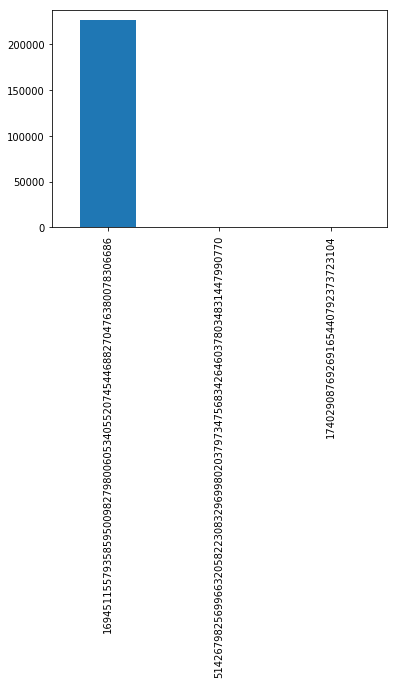

In [87]:
attack['int'].value_counts().plot.bar()
plt.show()

The above graph shows us the distribution of data. Each packets data is converted to an integer, the integer is the respective integer from the binary string that represents the data. We can then analyse the distribution, seeing that there is a large trend towards a set data sequence. This is a varience from the normal traffic that a network will experience, this will be discussed further down.

We will now compare to generated data, a completely random generation. This will allow us to determine methods of detection for attacks where the data generation is random, unlike the above case.

The generated data is of variable sizes, ranging from 250,000 data points to 2,000,000 data points.

start


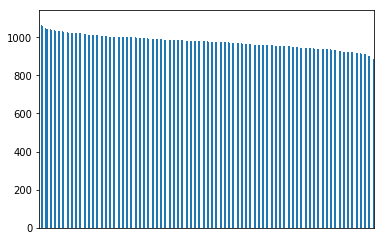

complete


In [88]:
print('start')
generated250k = pd.read_csv("../GeneratedDataSegmentsSmall250k.csv")
generated250k = generated250k[generated250k.data.notnull()]
#print(generated250k['int'].value_counts())
generated250k['int'].value_counts().plot.bar()
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.show()
print('complete')

start


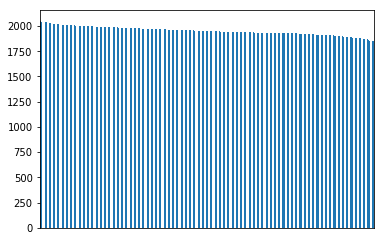

complete


In [89]:
print('start')
generated500k = pd.read_csv("../GeneratedDataSegmentsSmall500k.csv")
generated500k = generated500k[generated500k.data.notnull()]
#print(generated250k['int'].value_counts())
generated500k['int'].value_counts().plot.bar()
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.show()
print('complete')

start


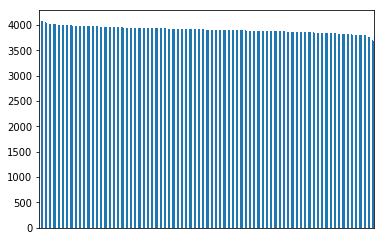

complete


In [90]:
print('start')
generated1m = pd.read_csv("../GeneratedDataSegmentsSmall1m.csv")
generated1m = generated1m[generated1m.data.notnull()]
#print(generated250k['int'].value_counts())
generated1m['int'].value_counts().plot.bar()
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.show()
print('complete')

start


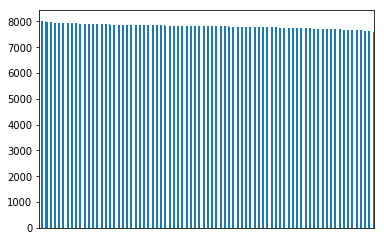

complete


In [91]:
print('start')
generated2m = pd.read_csv("../GeneratedDataSegmentsSmall2m.csv")
generated2m = generated2m[generated2m.data.notnull()]
#print(generated250k['int'].value_counts())
generated2m['int'].value_counts().plot.bar()
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.show()
print('complete')

start


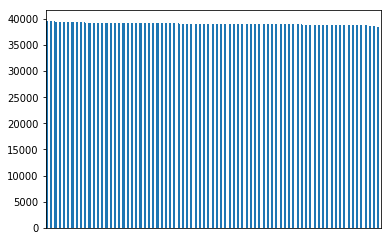

complete


In [92]:
print('start')
generated10m = pd.read_csv("../GeneratedDataSegmentsSmall10m.csv")
generated10m = generated10m[generated10m.data.notnull()]
#print(generated250k['int'].value_counts())
generated10m['int'].value_counts().plot.bar()
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.show()
print('complete')

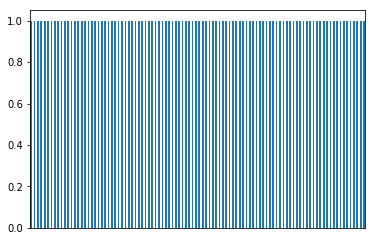

complete


In [93]:
df1 = pd.read_csv("../donated_capture_jp_1_ints.csv")
df1 = df1[df1.data.notnull()]
df1['int'].value_counts().plot.bar()
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.show()
print('complete')

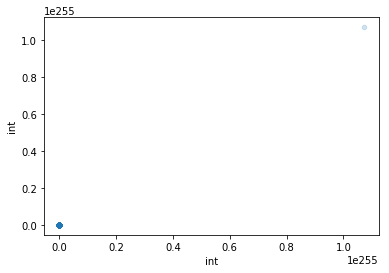

In [94]:
df1['int'] = df1['int'].astype(str).astype(float)
df1.plot.scatter(x='int',y='int', alpha=0.2)
plt.show()

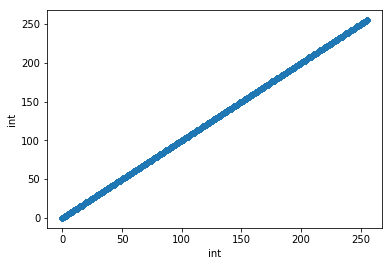

In [95]:
generated10m.plot.scatter(x='int',y='int')
plt.show()

<b>Models</b>
https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

In [96]:
benignData = pd.read_csv("../../Captures/donated_capture_jp_3.wireshark_output.csv")
benignData["Class"] = np.random.randint(1, 2, benignData.shape[0])
benignData["TBP"] = benignData["Time"] -  benignData["Time"].shift()
benignData


No.        Time             Source      Destination Protocol  \
0            1    0.000000      104.16.103.24    192.168.1.109  TLSv1.2   
1            2    0.010364      192.168.1.109    43.245.163.15      UDP   
2            3    0.022365      43.245.163.15    192.168.1.109      UDP   
3            4    0.040524      192.168.1.109    104.16.103.24      TCP   
4            5    0.227084  Ubiquiti_b4:1e:c0        Broadcast      ARP   
5            6    0.417707      43.245.163.15    192.168.1.109      UDP   
6            7    0.417916      192.168.1.109    43.245.163.15      UDP   
7            8    0.841456       192.168.1.83      224.0.0.251     MDNS   
8            9    0.958287      192.168.1.109    104.16.103.24      TCP   
9           10    0.964527       157.240.8.18    192.168.1.109  TLSv1.2   
10          11    0.968093      104.16.103.24    192.168.1.109      TCP   
11          12    0.977514      192.168.1.109     157.240.8.18  TLSv1.2   
12          13    0.987828       157.240.8.18    192.168.1.109  TLSv1.2   
13          14    1.014930      192.168.1.109    43.245.163.15      UDP   
14          15    1.024731      43.245.163.15    192.168.1.109      UDP   
15          16    1.027250      192.168.1.109     157.240.8.18      TCP   
16          17    1.250962  Ubiquiti_b4:1e:c0        Broadcast      ARP   
17          18    1.328470      192.168.1.109    43.245.163.15      UDP   
18          19    1.348507      192.168.1.109    43.245.163.15      UDP   
19          20    1.368510      192.168.1.109    43.245.163.15      UDP   
20          21    1.388529      192.168.1.109    43.245.163.15      UDP   
21          22    1.408491      192.168.1.109    43.245.163.15      UDP   
22          23    1.426380      43.245.163.15    192.168.1.109      UDP   
23          24    1.426470      192.168.1.109    43.245.163.15      UDP   
24          25    1.428498      192.168.1.109    43.245.163.15      UDP   
25          26    1.448517      192.168.1.109    43.245.163.15      UDP   
26          27    1.468046      192.168.1.109    43.245.163.15      UDP   
27          28    1.488075      192.168.1.109    43.245.163.15      UDP   
28          29    1.508073      192.168.1.109    43.245.163.15      UDP   
29          30    1.528030      192.168.1.109    43.245.163.15      UDP   
...        ...         ...                ...              ...      ...   
133488  133489  856.354379      43.245.163.15    192.168.1.109      UDP   
133489  133490  856.367928     103.10.125.146    192.168.1.109      UDP   
133490  133491  856.375512      43.245.163.15    192.168.1.109      UDP   
133491  133492  856.380923      192.168.1.109   103.10.125.146      UDP   
133492  133493  856.384007     103.10.125.146    192.168.1.109      UDP   
133493  133494  856.398180       192.168.1.68  239.255.255.250     SSDP   
133494  133495  856.398823      43.245.163.15    192.168.1.109      UDP   
133495  133496  856.400025     103.10.125.146    192.168.1.109      UDP   
133496  133497  856.414871     103.10.125.146    192.168.1.109      UDP   
133497  133498  856.415300      43.245.163.15    192.168.1.109      UDP   
133498  133499  856.430736     103.10.125.146    192.168.1.109      UDP   
133499  133500  856.434548      43.245.163.15    192.168.1.109      UDP   
133500  133501  856.447010     103.10.125.146    192.168.1.109      UDP   
133501  133502  856.450799      192.168.1.109   103.10.125.146      UDP   
133502  133503  856.455684      43.245.163.15    192.168.1.109      UDP   
133503  133504  856.462273     103.10.125.146    192.168.1.109      UDP   
133504  133505  856.476260      43.245.163.15    192.168.1.109      UDP   
133505  133506  856.477533     103.10.125.146    192.168.1.109      UDP   
133506  133507  856.493150     103.10.125.146    192.168.1.109      UDP   
133507  133508  856.494623      43.245.163.15    192.168.1.109      UDP   
133508  133509  856.494928      43.245.163.15    192.168.1.109      UDP   
133509  133510  856.495033      192.

In [97]:
maliciousData = pd.read_csv("../../Captures/LOICTest_wirehshark_output.csv")
maliciousData["Class"] = np.random.randint(0, 1, maliciousData.shape[0])
maliciousData["TBP"] = maliciousData["Time"] -  maliciousData["Time"].shift()
maliciousData


No.       Time         Source    Destination Protocol  Length  \
0           67   9.355778  192.168.1.109  58.164.248.90      UDP      74   
1           68   9.355781  192.168.1.109  58.164.248.90      UDP      74   
2           69   9.355787  192.168.1.109  58.164.248.90      UDP      74   
3           70   9.355794  192.168.1.109  58.164.248.90      UDP      74   
4           71   9.355796  192.168.1.109  58.164.248.90      UDP      74   
5           72   9.355804  192.168.1.109  58.164.248.90      UDP      74   
6           73   9.355805  192.168.1.109  58.164.248.90      UDP      74   
7           74   9.355812  192.168.1.109  58.164.248.90      UDP      74   
8           75   9.355813  192.168.1.109  58.164.248.90      UDP      74   
9           76   9.355820  192.168.1.109  58.164.248.90      UDP      74   
10          77   9.355822  192.168.1.109  58.164.248.90      UDP      74   
11          78   9.355828  192.168.1.109  58.164.248.90      UDP      74   
12          79   9.355831  192.168.1.109  58.164.248.90      UDP      74   
13          80   9.355835  192.168.1.109  58.164.248.90      UDP      74   
14          81   9.355839  192.168.1.109  58.164.248.90      UDP      74   
15          82   9.355844  192.168.1.109  58.164.248.90      UDP      74   
16          83   9.355848  192.168.1.109  58.164.248.90      UDP      74   
17          84   9.355852  192.168.1.109  58.164.248.90      UDP      74   
18          85   9.355856  192.168.1.109  58.164.248.90      UDP      74   
19          86   9.355861  192.168.1.109  58.164.248.90      UDP      74   
20          87   9.355864  192.168.1.109  58.164.248.90      UDP      74   
21          88   9.355869  192.168.1.109  58.164.248.90      UDP      74   
22          89   9.355873  192.168.1.109  58.164.248.90      UDP      74   
23          90   9.355877  192.168.1.109  58.164.248.90      UDP      74   
24          91   9.355881  192.168.1.109  58.164.248.90      UDP      74   
25          92   9.355885  192.168.1.109  58.164.248.90      UDP      74   
26          93   9.355889  192.168.1.109  58.164.248.90      UDP      74   
27          94   9.355893  192.168.1.109  58.164.248.90      UDP      74   
28          95   9.355898  192.168.1.109  58.164.248.90      UDP      74   
29          96   9.355901  192.168.1.109  58.164.248.90      UDP      74   
...        ...        ...            ...            ...      ...     ...   
226448  226515  18.450190  192.168.1.109  58.164.248.90      UDP      74   
226449  226516  18.450197  192.168.1.109  58.164.248.90      UDP      74   
226450  226517  18.450204  192.168.1.109  58.164.248.90      UDP      74   
226451  226518  18.450211  192.168.1.109  58.164.248.90      UDP      74   
226452  226519  18.450217  192.168.1.109  58.164.248.90      UDP      74   
226453  226520  18.450223  192.168.1.109  58.164.248.90      UDP      74   
226454  226521  18.450230  192.168.1.109  58.164.248.90      UDP      74   
226455  226522  18.450236  192.168.1.109  58.164.248.90      UDP      74   
226456  226523  18.450243  192.168.1.109  58.164.248.90      UDP      74   
226457  226524  18.450250  192.168.1.109  58.164.248.90      UDP      74   
226458  226525  18.450257  192.168.1.109  58.164.248.90      UDP      74   
226459  226526  18.450264  192.168.1.109  58.164.248.90      UDP      74   
226460  226527  18.450271  192.168.1.109  58.164.248.90      UDP      74   
226461  226528  18.450277  192.168.1.109  58.164.248.90      UDP      74   
226462  226529  18.450284  192.168.1.109  58.164.248.90      UDP      74   
226463  226530  18.450290  192.168.1.109  58.164.248.90      UDP      74   
226464  226531  18.450297  192.168.1.109  58.164.248.90      UDP      74   
226465  226532  18.450303  192.168.1.109  58.164.248.90      UDP      74   
226466  226533  18.450310  192.168.1.109  58.164.248.90      UDP      74   
226467  226534  18.450339  192.168.1.109  58.164.248.90      UDP      74   
226468  226535  18.450346  192.168.1.109  58.164.248.90    

In [98]:
frames = [benignData, maliciousData]

modelData = pd.concat(frames)
modelData = modelData.drop(['No.','Time','Source','Destination','Info',"Protocol"], axis=1)
columnsTitles=["Length","TBP","Class"]
modelData=modelData.reindex(columns=columnsTitles)
modelData = modelData.dropna()
modelData

Length       TBP  Class
1           55  0.010364      1
2           55  0.012001      1
3           54  0.018159      1
4           42  0.186560      1
5           55  0.190623      1
6           57  0.000209      1
7          103  0.423540      1
8           55  0.116831      1
9          320  0.006240      1
10          66  0.003566      1
11         368  0.009421      1
12          88  0.010314      1
13          55  0.027102      1
14          55  0.009801      1
15          54  0.002519      1
16          42  0.223712      1
17         126  0.077508      1
18         134  0.020037      1
19         136  0.020003      1
20         125  0.020019      1
21         133  0.019962      1
22          55  0.017889      1
23          57  0.000090      1
24         134  0.002028      1
25         132  0.020019      1
26         135  0.019529      1
27         134  0.020029      1
28         126  0.019998      1
29         126  0.019957      1
30         123  0.020042      1
...        ...       ...    ...
226448      74  0.000007      0
226449      74  0.000007      0
226450      74  0.000007      0
226451      74  0.000007      0
226452      74  0.000006      0
226453      74  0.000006      0
226454      74  0.000007      0
226455      74  0.000006      0
226456      74  0.000007      0
226457      74  0.000007      0
226458      74  0.000007      0
226459      74  0.000007      0
226460      74  0.000007      0
226461      74  0.000006      0
226462      74  0.000007      0
226463      74  0.000006      0
226464      74  0.000007      0
226465      74  0.000006      0
226466      74  0.000007      0
226467      74  0.000029      0
226468      74  0.000007      0
226469      74  0.000008      0
226470      74  0.000007      0
226471      74  0.000007      0
226472      74  0.000007      0
226473      74  0.000006      0
226474      74  0.000007      0
226475      74  0.000019      0
226476      74  0.000007      0
226477      74  0.000007      0

[359994 rows x 3 columns]

In [99]:
print('begin')

print(benignData['TBP'].mean())

print(maliciousData['TBP'].mean())



begin
0.006415326804826352
4.0157026982872434e-05
